In [1]:
import math
import pandas as pd
import numpy as np
from vega_datasets import data

%matplotlib inline
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [30]:
sf_temps = data.sf_temps().set_index('date')

[Text(0.5, 1.0, 'max')]

<Figure size 1152x504 with 0 Axes>

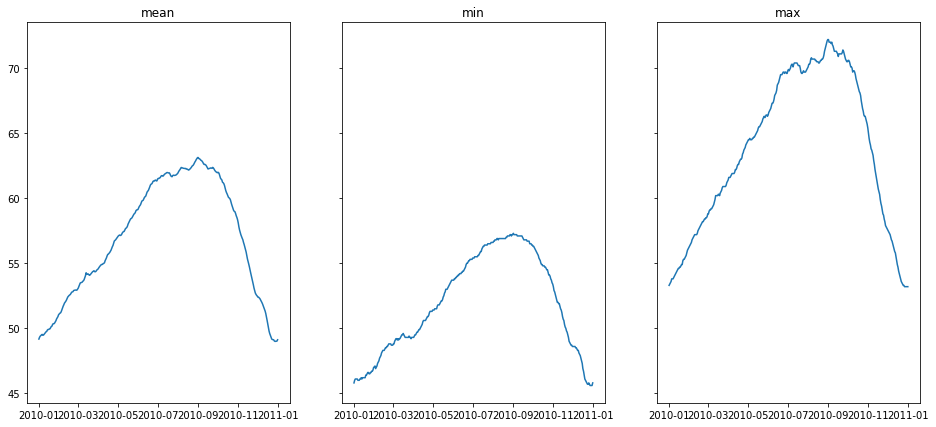

In [32]:
plt.figure(figsize=(16, 7))
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 7), sharey=True)

ax1.plot(sf_temps.resample('D').mean())
ax1.set(title='mean')

ax2.plot(sf_temps.resample('D').min())
ax2.set(title='min')

ax3.plot(sf_temps.resample('D').max())
ax3.set(title='max')

In [4]:
# coldest month on average
sf_temps.resample('M').mean().sort_values(by='temp').head()

,temp
date,
2010-01-31,49.984140
2010-12-31,50.498253
2010-02-28,52.243899
2010-03-31,53.956528
2010-11-30,55.185139


In [5]:
# highest average temp
sf_temps.resample('M').mean().sort_values(by='temp', ascending=False).head()

,temp
date,
2010-09-30,62.487083
2010-08-31,62.405376
2010-07-31,61.765457
2010-06-30,60.444722
2010-10-31,60.253091


In [6]:
sf_temps = data.sf_temps().set_index('date').temp.resample('D').agg(['min', 'max'])
sf_temps

,min,max
date,,
2010-01-01,45.8,53.3
2010-01-02,46.0,53.4
2010-01-03,46.1,53.5
2010-01-04,46.1,53.6
2010-01-05,46.1,53.8
...,...,...
2010-12-27,45.6,53.2
2010-12-28,45.6,53.2
2010-12-29,45.6,53.2


In [7]:
sf_temps['delta_temp'] = sf_temps['max'] - sf_temps['min']
sf_temps.head()

,min,max,delta_temp
date,,,
2010-01-01,45.8,53.3,7.5
2010-01-02,46.0,53.4,7.4
2010-01-03,46.1,53.5,7.4
2010-01-04,46.1,53.6,7.5
2010-01-05,46.1,53.8,7.7


In [8]:
sf_temps.resample('M').delta_temp.mean().sort_values(ascending=False)

date
2010-09-30    14.403333
2010-07-31    13.977419
2010-06-30    13.950000
2010-08-31    13.870968
2010-10-31    13.432258
2010-05-31    12.909677
2010-04-30    12.320000
2010-03-31    10.854839
2010-11-30    10.236667
2010-02-28     9.485714
2010-01-31     8.341935
2010-12-31     7.925806
Name: delta_temp, dtype: float64

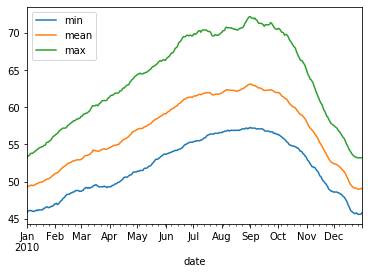

In [35]:
data.sf_temps()\
    .set_index('date')\
    .temp\
    .resample('D')\
    .agg(['min', 'mean', 'max'])\
    .plot()

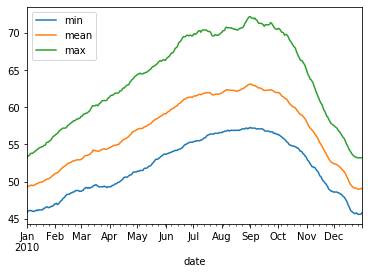

In [41]:
(data.sf_temps()
 .set_index('date')
 .temp
 .resample('D')
 .agg(['min', 'mean', 'max'])
 .plot()
)

In [10]:
weather = data.seattle_weather().set_index('date')
weather.head()

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle
2012-01-02,10.9,10.6,2.8,4.5,rain
2012-01-03,0.8,11.7,7.2,2.3,rain
2012-01-04,20.3,12.2,5.6,4.7,rain
2012-01-05,1.3,8.9,2.8,6.1,rain


In [43]:
weather.weather.value_counts()

sun        714
fog        411
rain       259
drizzle     54
snow        23
Name: weather, dtype: int64

In [11]:
weather.resample('M').precipitation.sum().sort_values().tail(4)

date
2012-11-30    210.5
2015-11-30    212.6
2014-03-31    240.0
2015-12-31    284.5
Name: precipitation, dtype: float64

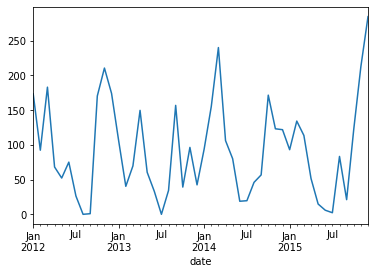

In [12]:
weather.resample('M').precipitation.sum().plot()

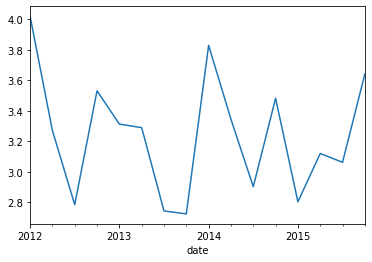

In [46]:
weather.resample('Q').wind.mean().plot()

In [14]:
weather.resample('M').wind.mean().sort_values().tail()

date
2012-02-29    3.903448
2014-11-30    3.983333
2012-03-31    4.248387
2015-12-31    4.341935
2014-02-28    4.528571
Name: wind, dtype: float64

In [49]:
(weather
 .groupby(weather.index.strftime('%B'))
 .precipitation
 .sum()
 .sort_values()
 .tail()
)

January     466.0
October     503.4
March       606.2
December    622.7
November    642.5
Name: precipitation, dtype: float64

In [50]:
weather['did_rain'] = weather.precipitation > 0
weather

,precipitation,temp_max,temp_min,wind,weather,did_rain
date,,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle,False
2012-01-02,10.9,10.6,2.8,4.5,rain,True
2012-01-03,0.8,11.7,7.2,2.3,rain,True
2012-01-04,20.3,12.2,5.6,4.7,rain,True
2012-01-05,1.3,8.9,2.8,6.1,rain,True
...,...,...,...,...,...,...
2015-12-27,8.6,4.4,1.7,2.9,fog,True
2015-12-28,1.5,5.0,1.7,1.3,fog,True
2015-12-29,0.0,7.2,0.6,2.6,fog,False


In [52]:
weather.groupby(weather.index.strftime('%B')).did_rain.sum().sort_values().tail()

January     66.0
November    71.0
February    73.0
March       73.0
December    81.0
Name: did_rain, dtype: float64

In [54]:
flights = data.flights_20k().set_index('date')
flights

,delay,distance,origin,destination
date,,,,
2001-01-13 14:56:00,32,417,SAN,SJC
2001-01-31 16:40:00,-5,1093,FLL,ISP
2001-02-11 18:39:00,3,293,LBB,DAL
2001-01-10 21:00:00,-15,550,MSY,MCO
2001-03-30 21:45:00,-2,229,STL,IND
...,...,...,...,...
2001-03-22 15:10:00,4,446,SAN,OAK
2001-01-19 13:05:00,-6,1489,SEA,MCI
2001-02-07 11:37:00,-16,1848,MCO,PHX


In [58]:
flights.delay = np.where(flights.delay < 0, 0, flights.delay)
flights.head()

,delay,distance,origin,destination,hour
date,,,,,
2001-01-13 14:56:00,32,417,SAN,SJC,14
2001-01-31 16:40:00,0,1093,FLL,ISP,16
2001-02-11 18:39:00,3,293,LBB,DAL,18
2001-01-10 21:00:00,0,550,MSY,MCO,21
2001-03-30 21:45:00,0,229,STL,IND,21


In [59]:
flights['hour'] = flights.index.hour
flights

,delay,distance,origin,destination,hour
date,,,,,
2001-01-13 14:56:00,32,417,SAN,SJC,14
2001-01-31 16:40:00,0,1093,FLL,ISP,16
2001-02-11 18:39:00,3,293,LBB,DAL,18
2001-01-10 21:00:00,0,550,MSY,MCO,21
2001-03-30 21:45:00,0,229,STL,IND,21
...,...,...,...,...,...
2001-03-22 15:10:00,4,446,SAN,OAK,15
2001-01-19 13:05:00,0,1489,SEA,MCI,13
2001-02-07 11:37:00,0,1848,MCO,PHX,11


In [61]:
flights.groupby('hour').delay.mean()

hour
0     127.916667
1     170.000000
3     302.500000
5       0.513514
6       2.494856
7       3.071932
8       4.030483
9       5.002504
10      5.850953
11      7.361495
12      9.214341
13     11.453311
14     10.747320
15     13.137592
16     13.881068
17     13.199580
18     14.514218
19     16.256557
20     17.889778
21     21.626768
22     32.704607
23     65.353846
Name: delay, dtype: float64

In [65]:
flights['weekday'] = flights.index.strftime('%w %a')
flights.head()

,delay,distance,origin,destination,hour,weekday
date,,,,,,
2001-01-13 14:56:00,32,417,SAN,SJC,14,6 Sat
2001-01-31 16:40:00,0,1093,FLL,ISP,16,3 Wed
2001-02-11 18:39:00,3,293,LBB,DAL,18,0 Sun
2001-01-10 21:00:00,0,550,MSY,MCO,21,3 Wed
2001-03-30 21:45:00,0,229,STL,IND,21,5 Fri


In [67]:
flights.index.weekday_name

Index(['Saturday', 'Wednesday', 'Sunday', 'Wednesday', 'Friday', 'Wednesday',
       'Wednesday', 'Monday', 'Tuesday', 'Saturday',
       ...
       'Thursday', 'Thursday', 'Thursday', 'Friday', 'Thursday', 'Thursday',
       'Friday', 'Wednesday', 'Saturday', 'Wednesday'],
      dtype='object', name='date', length=20000)

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

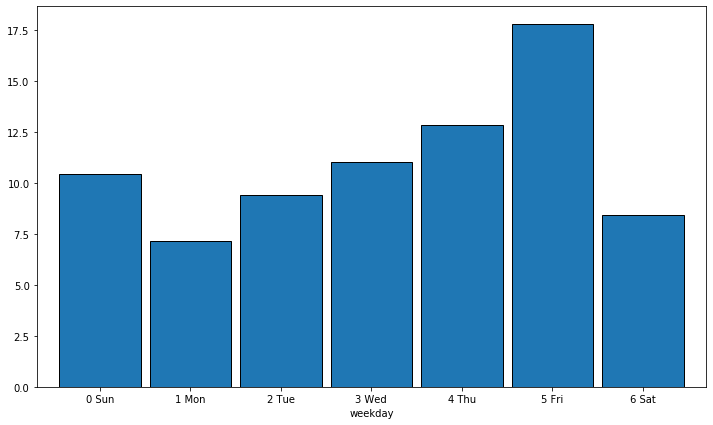

In [69]:
flights.groupby('weekday').delay.mean().plot.bar(edgecolor='black', width=.9, figsize=(12, 7))
# flights.groupby(flights.index.weekday_name).delay.mean().plot.bar(edgecolor='black', width=.9, figsize=(12, 7))
plt.xticks(rotation=0)

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

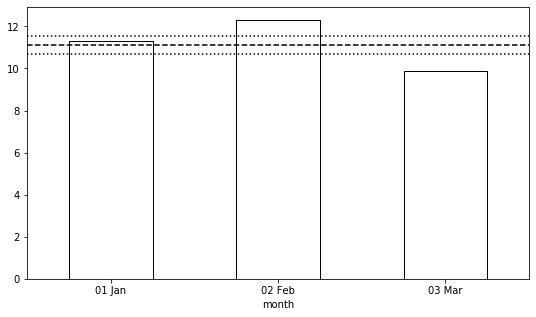

In [70]:
flights['month'] = flights.index.strftime('%m %b')
flights.groupby('month').delay.mean().plot.bar(figsize=(9, 5), color='white', edgecolor='black')

# add 99% ci lines for pop mean
mu = flights.delay.mean()
se = 2.58 * (flights.delay.std() / math.sqrt(flights.shape[0]))
ub, lb = mu + se, mu - se

plt.hlines(mu, -.5, 2.5, ls='--')
plt.hlines([lb, ub], -.5, 2.5, ls=':')
plt.xticks(rotation=0)

In [22]:
# when is the absolute worst time to travel
flights.groupby(['month', 'weekday', 'hour']).delay.mean().sort_values().tail().reset_index()

,month,weekday,hour,delay
0,01 Jan,5 Fri,1,170.000000
1,02 Feb,4 Thu,0,184.333333
2,01 Jan,2 Tue,3,245.000000
3,02 Feb,0 Sun,0,260.000000
4,02 Feb,5 Fri,3,360.000000


In [74]:
iowa = data.iowa_electricity()
iowa.head()

,year,source,net_generation
0,2001-01-01,Fossil Fuels,35361
1,2002-01-01,Fossil Fuels,35991
2,2003-01-01,Fossil Fuels,36234
3,2004-01-01,Fossil Fuels,36205
4,2005-01-01,Fossil Fuels,36883


In [75]:
iowa.shape

(51, 3)

In [76]:
iowa.year.value_counts()

2009-01-01    3
2001-01-01    3
2002-01-01    3
2008-01-01    3
2005-01-01    3
2011-01-01    3
2014-01-01    3
2004-01-01    3
2017-01-01    3
2012-01-01    3
2007-01-01    3
2010-01-01    3
2016-01-01    3
2013-01-01    3
2003-01-01    3
2006-01-01    3
2015-01-01    3
Name: year, dtype: int64

In [77]:
iowa.source.value_counts()

Fossil Fuels      17
Nuclear Energy    17
Renewables        17
Name: source, dtype: int64

In [ ]:
iowa = iowa.set_index('year')

In [84]:
import seaborn as sns

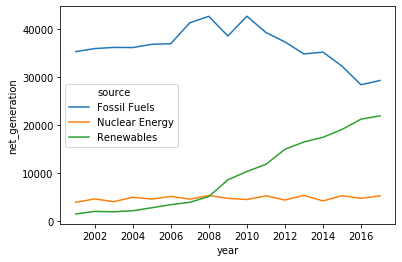

In [86]:
sns.lineplot(data=iowa.reset_index(), x='year', y='net_generation', hue='source')

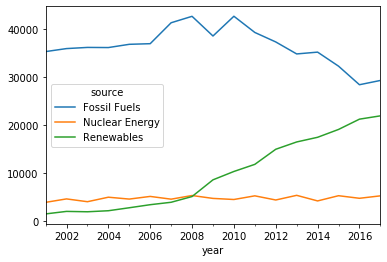

In [93]:
# values, rows, columns
iowa.pivot_table('net_generation', 'year', 'source').plot()

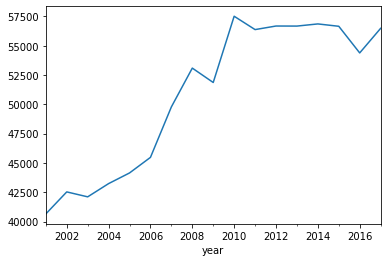

In [83]:
iowa.resample('Y').sum().net_generation.plot()

In [97]:
iowa['yearly_total'] = iowa.groupby('year').net_generation.transform('sum')
iowa

,source,net_generation,yearly_total
year,,,
2001-01-01,Fossil Fuels,35361,40651
2002-01-01,Fossil Fuels,35991,42528
2003-01-01,Fossil Fuels,36234,42107
2004-01-01,Fossil Fuels,36205,43236
2005-01-01,Fossil Fuels,36883,44145
2006-01-01,Fossil Fuels,37014,45473
2007-01-01,Fossil Fuels,41389,49778
2008-01-01,Fossil Fuels,42734,53086
2009-01-01,Fossil Fuels,38620,51859


In [98]:
iowa['p_generation'] = iowa.net_generation / iowa.groupby('year').net_generation.transform('sum')
iowa.head()

,source,net_generation,yearly_total,p_generation
year,,,,
2001-01-01,Fossil Fuels,35361,40651,0.869868
2002-01-01,Fossil Fuels,35991,42528,0.846290
2003-01-01,Fossil Fuels,36234,42107,0.860522
2004-01-01,Fossil Fuels,36205,43236,0.837381
2005-01-01,Fossil Fuels,36883,44145,0.835497


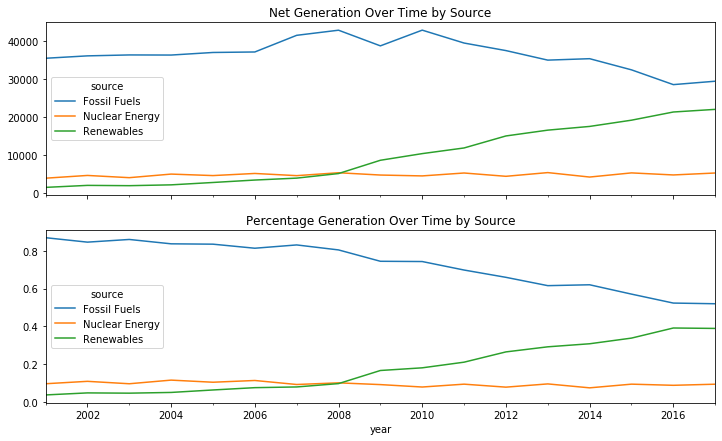

In [25]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 7), sharex=True)

iowa.pivot_table('net_generation', 'year', 'source').plot(ax=ax1)
ax1.set(title='Net Generation Over Time by Source')

iowa.pivot_table('p_generation', 'year', 'source').plot(ax=ax2)
ax2.set(title='Percentage Generation Over Time by Source')

fig.subplots_adjust(hspace=.2)

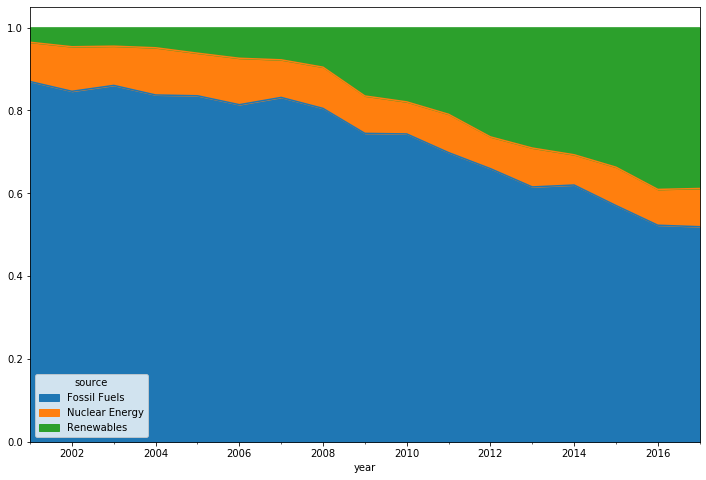

In [100]:
iowa.pivot_table('p_generation', 'year', 'source').plot.area(figsize=(12, 8))

In [26]:
df = data.sf_temps().set_index('date').resample('D').mean()
df.head()

,temp
date,
2010-01-01,49.170833
2010-01-02,49.304167
2010-01-03,49.391667
2010-01-04,49.445833
2010-01-05,49.491667


In [105]:
# .cut -- equal sized bins
# .qcut -- ~ same # of observations in each bin
df['temp_bin'] = pd.qcut(df.temp, 4, labels=['cold', 'cool', 'warm', 'hot'])
# df['temp_bin'] = pd.qcut(df.temp, 4)

df

,temp,temp_bin
date,,
2010-01-01,49.170833,cold
2010-01-02,49.304167,cold
2010-01-03,49.391667,cold
2010-01-04,49.445833,cold
2010-01-05,49.491667,cold
...,...,...
2010-12-27,48.991667,cold
2010-12-28,49.000000,cold
2010-12-29,49.012500,cold


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

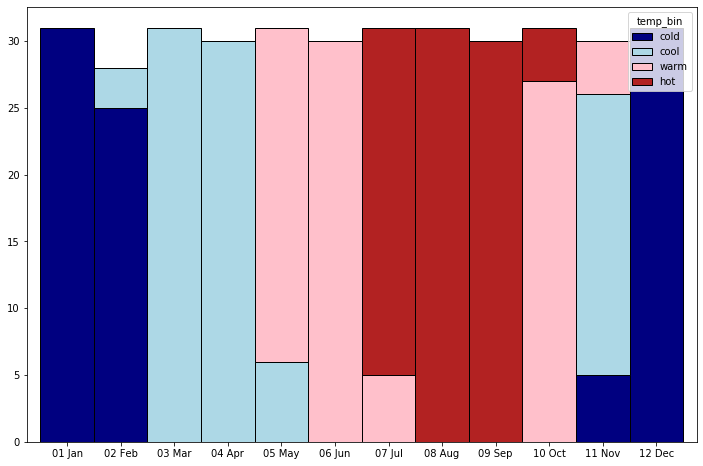

In [117]:
(df
 .groupby([df.index.strftime('%m %b'), 'temp_bin'])
 .count()
 .unstack()
 .fillna(0)
 .temp
 .plot.bar(
     stacked=True,
     color=['navy', 'lightblue', 'pink', 'firebrick'],
     figsize=(12, 8),
     width=1, edgecolor='black',
 )
)
plt.xticks(rotation=0)